In [84]:
import pandas as pd
import numpy as np

In [85]:
raw_file = pd.read_csv("level_progress.csv")

In [86]:
raw_file.drop(["event_datetime"], axis= 1, inplace=True)

In [87]:
raw_file.drop(["player_id","session_id"], axis=1, inplace=True)

In [88]:
droprowsindex= raw_file[raw_file["status"] == "start"].index

In [89]:
comp_fail=raw_file.drop(droprowsindex, axis=0)
comp_fail.head()

,level_number,status
0,6,complete
6,0,complete
12,4,complete
13,3,complete
14,3,complete


In [90]:
complete= comp_fail[comp_fail["status"] =="complete"]
fail= comp_fail[comp_fail["status"] =="fail"]

In [91]:
complete.head()

,level_number,status
0,6,complete
6,0,complete
12,4,complete
13,3,complete
14,3,complete


In [92]:
fail.head()

,level_number,status
37,4,fail
47,3,fail
57,4,fail
71,8,fail
76,4,fail


In [93]:
complete.replace("complete",1,inplace=True)
fail.replace("fail",1, inplace=True)

c:\users\ravit\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [94]:
display(complete)
display(fail)

,level_number,status
0,6,1
6,0,1
12,4,1
13,3,1
14,3,1
...,...,...
55813,12,1
55815,1,1
55817,8,1
55823,0,1


,level_number,status
37,4,1
47,3,1
57,4,1
71,8,1
76,4,1
...,...,...
55763,14,1
55773,14,1
55789,10,1
55808,3,1


In [95]:
complete_sum= complete.groupby(["level_number"]).sum()
fail_sum= fail.groupby(["level_number"]).sum()

In [96]:
complete_sum.rename(columns = {'status':'completed_sum'}, inplace = True)
fail_sum.rename(columns = {'status':'fail_sum'}, inplace = True)

In [97]:
display(complete_sum.head())
display(fail_sum.head())

,completed_sum
level_number,
0,3736
1,3164
2,2671
3,1963
4,1640


,fail_sum
level_number,
0,37
1,20
2,91
3,865
4,475


In [98]:
#final_df=pd.merge(complete_sum,fail_sum,on="level_number")
final_df = pd.concat([complete_sum, fail_sum], axis=1, sort=False)

In [102]:
final_df.fillna(0,inplace=True)
final_df

,completed_sum,fail_sum
level_number,,
0,3736,37.0
1,3164,20.0
2,2671,91.0
3,1963,865.0
4,1640,475.0
5,1281,537.0
6,1002,400.0
7,785,255.0
8,637,255.0


In [103]:
#applying formula fail% = [fail/(fail+complete)] * 100
final_df["fail_percent"]=(final_df["fail_sum"]/(final_df["completed_sum"]+final_df["fail_sum"]))*100

In [125]:
final_df

,completed_sum,fail_sum,fail_percent
level_number,,,
0,3736,37.0,0.980652
1,3164,20.0,0.628141
2,2671,91.0,3.294714
3,1963,865.0,30.586987
4,1640,475.0,22.458629
5,1281,537.0,29.537954
6,1002,400.0,28.530670
7,785,255.0,24.519231
8,637,255.0,28.587444


In [122]:
sorted_df= final_df.sort_values(by=['fail_percent'], ascending=False)

<Figure size 1440x720 with 0 Axes>

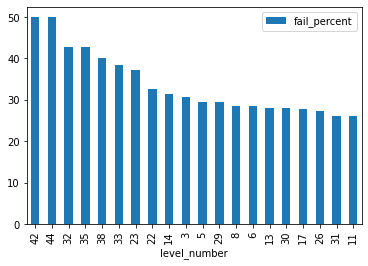

<Figure size 1440x720 with 0 Axes>

In [132]:
#Lets plot
import matplotlib.pyplot as plt

sorted_df.head(20).plot.bar(y="fail_percent")
plt.figure(figsize=(20,10))

In [124]:
sorted_df.head() #top 5 difficult levels

,completed_sum,fail_sum,fail_percent
level_number,,,
42,2,2.0,50.000000
44,1,1.0,50.000000
32,12,9.0,42.857143
35,4,3.0,42.857143
38,3,2.0,40.000000


In [126]:
sorted_df

,completed_sum,fail_sum,fail_percent
level_number,,,
42,2,2.0,50.000000
44,1,1.0,50.000000
32,12,9.0,42.857143
35,4,3.0,42.857143
38,3,2.0,40.000000
33,8,5.0,38.461538
23,66,39.0,37.142857
22,76,37.0,32.743363
14,229,105.0,31.437126
